In [22]:
import pickle
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [23]:
embeddings = pickle.load(open("Data/Embeddings/CIFAR/CIFAR_100_word_to_embedding_google_news.pk", 'rb'), encoding='latin1')

In [24]:
labels = embeddings.keys()
X = np.array([embeddings[label] for label in labels])
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
pca_embeddings = {}
for i, label in enumerate(labels):
    pca_embeddings[label] = X_r[i, :]
print(pca.explained_variance_)    

[ 0.89942163  0.6076172 ]


In [25]:
superclasses = {
    "aquatic mammals":["beaver", "dolphin", "otter", "seal", "whale"],
    "fish": ["aquarium fish", "flatfish", "ray", "shark", "trout"],
    "flowers": ["orchids", "poppies", "roses", "sunflowers", "tulips"],
    "food containers": ["bottles", "bowls", "cans", "cups", "plates"],
    "fruit and vegetables": ["apples", "mushrooms", "oranges", "pears", "peppers"],
    "household electrical devices": ["clock", "keyboard", "lamp", "telephone", "television"],
    "household furniture": ["bed", "chair", "couch", "table", "wardrobe"],
    "insects": ["bee", "beetle", "butterfly", "caterpillar", "cockroach"],
    "large carnivores": ["bear", "leopard", "lion", "tiger", "wolf"],
    "large man-made outdoor things": ["bridge", "castle", "house", "road", "skyscraper"],
    "large natural outdoor scenes": ["cloud", "forest", "mountain", "plain", "sea"],
    "large omnivores and herbivores": ["camel", "cattle", "chimpanzee", "elephant", "kangaroo"],
    "medium-sized mammals": ["fox", "porcupine", "possum", "raccoon", "skunk"],
    "non-insect invertebrates": ["crab", "lobster", "snail", "spider", "worm"],
    "people": ["baby", "boy", "girl", "man", "woman"],
    "reptiles": ["crocodile", "dinosaur", "lizard", "snake", "turtle"],
    "small mammals": ["hamster", "mouse", "rabbit", "shrew", "squirrel"],
    "trees": ["maple", "oak", "palm", "pine", "willow"],
    "vehicles 1": ["bicycle", "bus", "motorcycle", "pickup_truck", "train"],
    "vehicles 2": ["lawn_mower", "rocket", "streetcar", "tank", "tractor"]
}
super_class_labels = []
sc_data = {}
for superclass in superclasses.keys():
    sc_data[superclass] = []
    for label in superclasses[superclass]:
        sc_data[superclass].append(pca_embeddings[label])

In [26]:
to_include = [
         #'aquatic mammals', 
           #'fish', 
           #'flowers', 
           'food containers', 
           #'fruit and vegetables', 
           #'household electrical devices', 
           #'household furniture', 
           #'insects', 
           'large carnivores', 
           #'large man-made outdoor things', 
           #'large natural outdoor scenes', 
           #'large omnivores and herbivores', 
           'medium-sized mammals', 
           #'non-insect invertebrates', 
           #'people', 
           'reptiles', 
           'small mammals', 
           'trees', 
           'vehicles 1', 
           'vehicles 2'
          ]

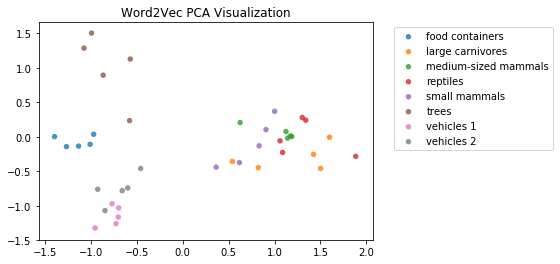

In [27]:
#print(sc_data)
# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, facecolor="1.0")
for sc in sc_data:
    if not sc in to_include:
        continue
    sc_data[sc] = np.array(sc_data[sc])
    x = sc_data[sc][:, 0]
    y = sc_data[sc][:, 1]
    ax.scatter(x, y, alpha=0.8, edgecolors='none', s=30, label=sc)
 
plt.title('Word2Vec PCA Visualization')
plt.legend(loc=9, bbox_to_anchor=(1.3, 1.0))
plt.show()

In [28]:
print(sc_data.keys())

dict_keys(['aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables', 'household electrical devices', 'household furniture', 'insects', 'large carnivores', 'large man-made outdoor things', 'large natural outdoor scenes', 'large omnivores and herbivores', 'medium-sized mammals', 'non-insect invertebrates', 'people', 'reptiles', 'small mammals', 'trees', 'vehicles 1', 'vehicles 2'])
